In [15]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 

df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


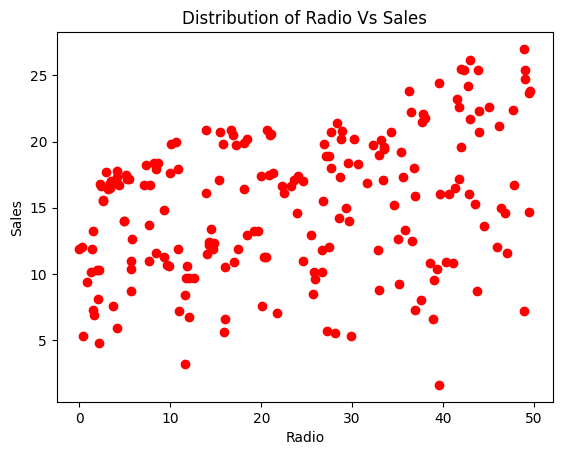

In [16]:
x=df.drop('Sales',axis=1)
y=df['Sales']
plt.scatter(x=df['Radio'],y=df['Sales'],color='red')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Distribution of Radio Vs Sales')
plt.show()

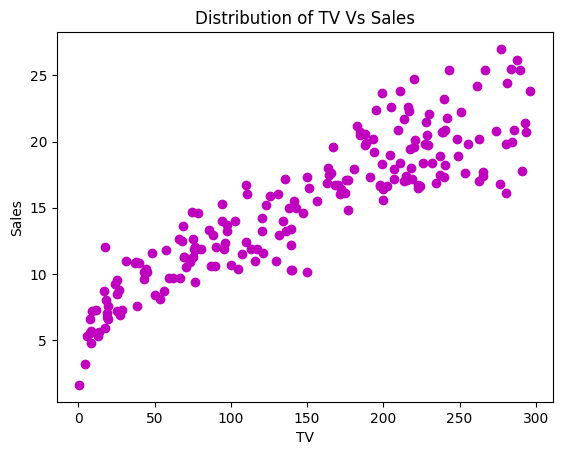

In [17]:
x=df.drop('Sales',axis=1)
y=df['Sales']
plt.scatter(x=df['TV'],y=df['Sales'],color='m')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Distribution of TV Vs Sales')
plt.show()

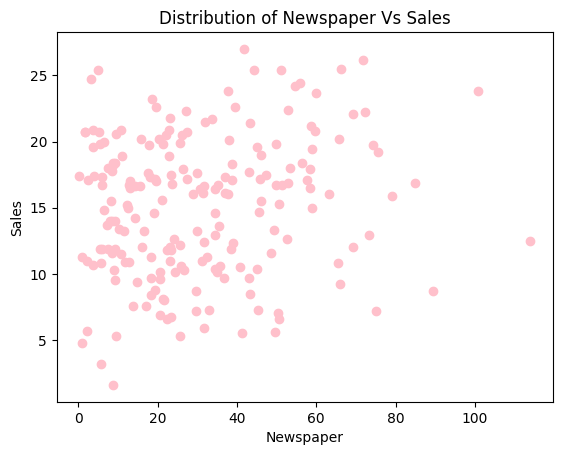

In [18]:
x=df.drop('Sales',axis=1)
y=df['Sales']
plt.scatter(x=df['Newspaper'],y=df['Sales'],color='pink')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Distribution of Newspaper Vs Sales')
plt.show()

In [19]:
# Train Test split 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((160, 3), (40, 3), (160,), (40,))

In [20]:
# Applying Linear Regression 

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [21]:
# Matrics R2 Score 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2_score=r2_score(y_test,y_pred)

print('The mean absolute error is ',mae)
print('The mean squared error is ',mse)
print('The R2 score of the model is ',r2_score)

The mean absolute error is  1.2748262109549338
The mean squared error is  2.9077569102710896
The R2 score of the model is  0.9059011844150826


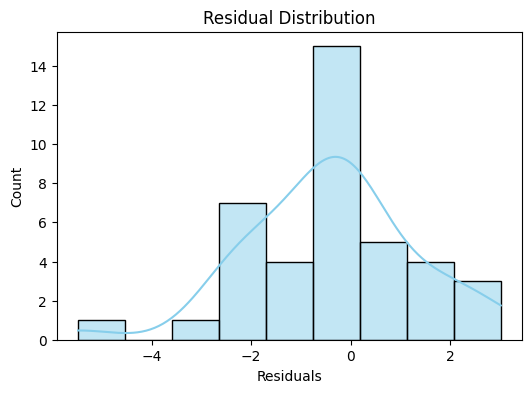

In [22]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, color='skyblue')
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.savefig('residual.png', dpi=300, bbox_inches='tight')
plt.show()

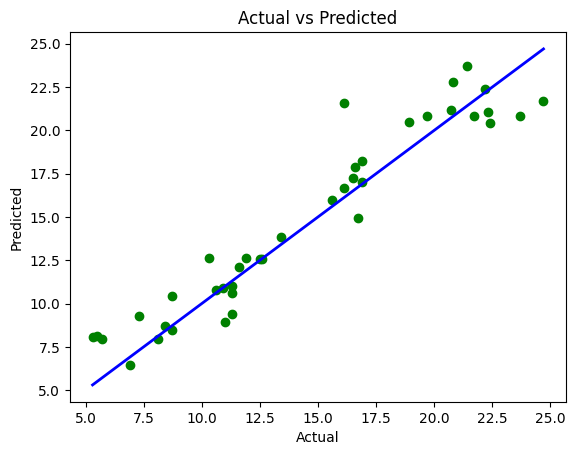

In [23]:
 # Regression Line Plot
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.savefig('actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()


In [24]:
# Predictive System 
def predict_sales(tv_budget,radio_budget,newspaper_budget):
    features=np.array([[tv_budget,radio_budget,newspaper_budget]])
    result=lr.predict(features).reshape(1,-1)
    return result[0]

In [25]:
df.iloc[0]
tv_budget= 230.1
radio_budget= 37.8
newspaper_budget = 69.2
sales_budget = 22.1

sales= predict_sales(tv_budget,radio_budget,newspaper_budget)

C:\Users\Abrar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
sales

array([21.37254028])

In [27]:
import pickle 
pickle.dump(lr,open('linear_regression_model.pkl','wb'))